In [1]:
from torchvision.models import resnet50, ResNet50_Weights

# Strings are also supported
model = resnet50(weights=ResNet50_Weights.DEFAULT)

In [6]:
import torch

x = torch.rand((32, 3, 224, 224)).cuda()
y = torch.rand([32, 3, 224, 224]).cuda()

In [7]:
%%timeit
with torch.cuda.amp.autocast():
  b = x @ y

584 µs ± 954 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%%timeit
b = x @ y

949 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [2]:
from timm import create_model

model = create_model(model_name="resnet50", pretrained=True)

In [6]:
from torchview import draw_graph

In [13]:
model_graph = draw_graph(model, input_size=(1, 3, 221, 221), expand_nested=True, depth=2)
model_graph.resize_graph(2.2)

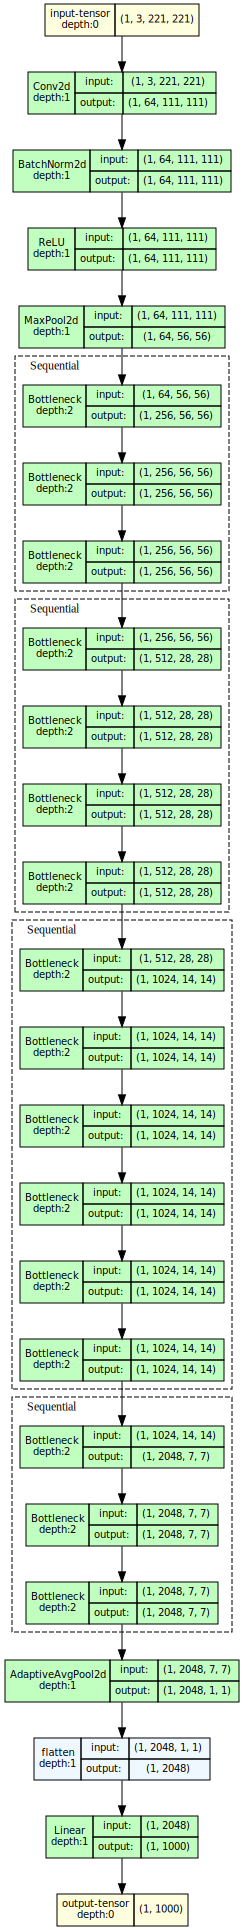

In [14]:
model_graph.visual_graph

In [18]:
from timm.data.transforms_factory import create_transform

create_transform(32,)

Compose(
    Resize(size=36, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(32, 32))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [19]:
create_transform(32, is_training=True)

Compose(
    RandomResizedCropAndInterpolation(size=(32, 32), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    RandomHorizontalFlip(p=0.5)
    ColorJitter(brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=None)
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)